In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset from the provided file path
data = pd.read_csv(r"C:\Users\stewi\Downloads\sentimentdataset.csv")


In [3]:
# Convert Timestamp to datetime for time-based analysis and extract hour
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour


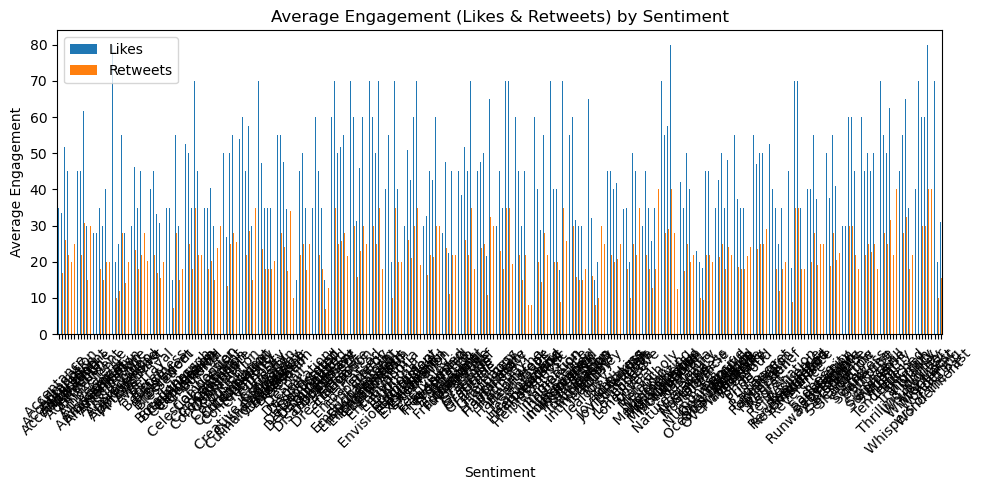

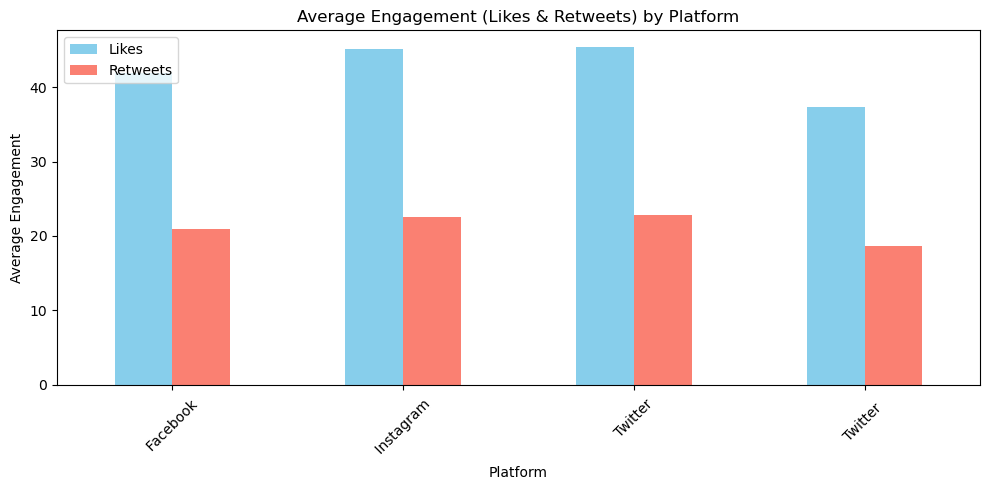

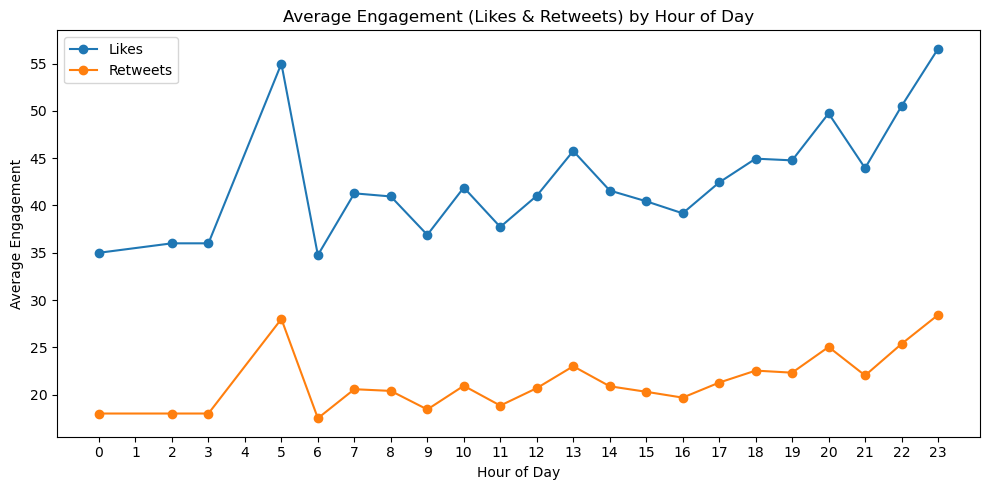

In [4]:
# 1. Engagement by Sentiment
sentiment_engagement = data.groupby('Sentiment')[['Likes', 'Retweets']].mean()

# 2. Engagement by Platform
platform_engagement = data.groupby('Platform')[['Likes', 'Retweets']].mean()

# 3. Average Engagement by Hour of Day
data['Hour'] = data['Timestamp'].dt.hour
hourly_engagement = data.groupby('Hour')[['Likes', 'Retweets']].mean()

# Plotting the trends

# Plot 1: Engagement by Sentiment
plt.figure(figsize=(10, 5))
sentiment_engagement.plot(kind='bar', ax=plt.gca())
plt.title("Average Engagement (Likes & Retweets) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.legend(["Likes", "Retweets"], loc="upper left")
plt.tight_layout()
plt.show()

# Plot 2: Engagement by Platform
plt.figure(figsize=(10, 5))
platform_engagement.plot(kind='bar', ax=plt.gca(), color=["skyblue", "salmon"])
plt.title("Average Engagement (Likes & Retweets) by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.legend(["Likes", "Retweets"], loc="upper left")
plt.tight_layout()
plt.show()

# Plot 3: Average Engagement by Hour of Day
plt.figure(figsize=(10, 5))
hourly_engagement.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Average Engagement (Likes & Retweets) by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.xticks(range(0, 24))
plt.legend(["Likes", "Retweets"], loc="upper left")
plt.tight_layout()
plt.show()

In [5]:
# Convert categorical variables (Platform, Sentiment) to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Platform', 'Sentiment'], drop_first=True)

In [6]:
# Define features (X) and target (y) for predicting Retweets
X = data_encoded[['Hour'] + [col for col in data_encoded.columns if 'Platform_' in col or 'Sentiment_' in col]]
y_retweets = data_encoded['Retweets']
y_likes = data_encoded['Likes']

In [7]:
# Split the data into training and testing sets for Retweets prediction
X_train_retweets, X_test_retweets, y_train_retweets, y_test_retweets = train_test_split(X, y_retweets, test_size=0.3, random_state=42)

In [8]:
# Initialize and train the Linear Regression model for Retweets
regressor_retweets = LinearRegression()
regressor_retweets.fit(X_train_retweets, y_train_retweets)

LinearRegression()

In [9]:
# Predict on the test set for Retweets
y_pred_retweets = regressor_retweets.predict(X_test_retweets)

In [10]:

# Calculate regression metrics for Retweets prediction
mse_retweets = mean_squared_error(y_test_retweets, y_pred_retweets)
rmse_retweets = np.sqrt(mse_retweets)
r2_retweets = r2_score(y_test_retweets, y_pred_retweets)


In [11]:
# Split the data into training and testing sets for Likes prediction
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.3, random_state=42)


In [12]:
# Initialize and train the Linear Regression model for Likes
regressor_likes = LinearRegression()
regressor_likes.fit(X_train_likes, y_train_likes)


LinearRegression()

In [13]:
# Predict on the test set for Likes
y_pred_likes = regressor_likes.predict(X_test_likes)


In [14]:
# Calculate regression metrics for Likes prediction
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
rmse_likes = np.sqrt(mse_likes)
r2_likes = r2_score(y_test_likes, y_pred_likes)


In [15]:
# Display results
results = {
    "Retweets Prediction": {
        "MSE": mse_retweets,
        "RMSE": rmse_retweets,
        "R-squared": r2_retweets
    },
    "Likes Prediction": {
        "MSE": mse_likes,
        "RMSE": rmse_likes,
        "R-squared": r2_likes
    }
}

results


{'Retweets Prediction': {'MSE': 1.3051451307886683e+25,
  'RMSE': 3612679242319.5674,
  'R-squared': -2.4726049896808754e+23},
 'Likes Prediction': {'MSE': 5.133679324972337e+25,
  'RMSE': 7164969870817.558,
  'R-squared': -2.43539595856585e+23}}